In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, rms)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [8]:
meta_div$fold_group <- NA
meta_div$fold_group[meta_div$FOLD <= 2] <- "Fail (< 2 fold)"
meta_div$fold_group[meta_div$FOLD >= 5] <- "Pass (> 5 fold)"

In [9]:
meta_div <- meta_div[ !meta_div$cancergroup %in% c("LFS", "Normal"), ]

In [10]:
meta_div$cancergroup[ which(meta_div$cancergroup == "Solid")] <- "Solid tumors"
names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

In [11]:
meta_div$log10shann <- log10(meta_div$observed_Shannon)

In [12]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "fold_group"         "log10shann"

t cell subsets

In [31]:
pbmc_tcells <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$fold_group),]

In [32]:
pbmc_tcells <- pbmc_tcells[ !is.na(pbmc_tcells$TE.),]

In [33]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "fold_group"         "log10shann"

In [55]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p1 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = Naïve. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none", 
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = Naïve. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Naïve T cells", title = "% Naïve T cells") 


In [56]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p2 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = SCM. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = SCM. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test") + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Stem central memory T cells", title = "% Stem central memory T cells") +
    scale_y_continuous(limits = c(0, 100))


In [57]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p3 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = CM. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = EM. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Central memory T cells", title = "% Central memory T cells") +
    scale_y_continuous(limits = c(0, 100))


In [58]:
p4 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = EM. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 1.2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = EM. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Effector memory T cells", title = "% Effector memory T cells") +
    scale_y_continuous(limits = c(0, 100))


In [59]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p5 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = TE. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = TE. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Effector T cells", title = "% Effector T cells") 


In [60]:
aligned_p <- cowplot::plot_grid(p1, p2, p3, p4, p5, align = "h", nrow = 1)

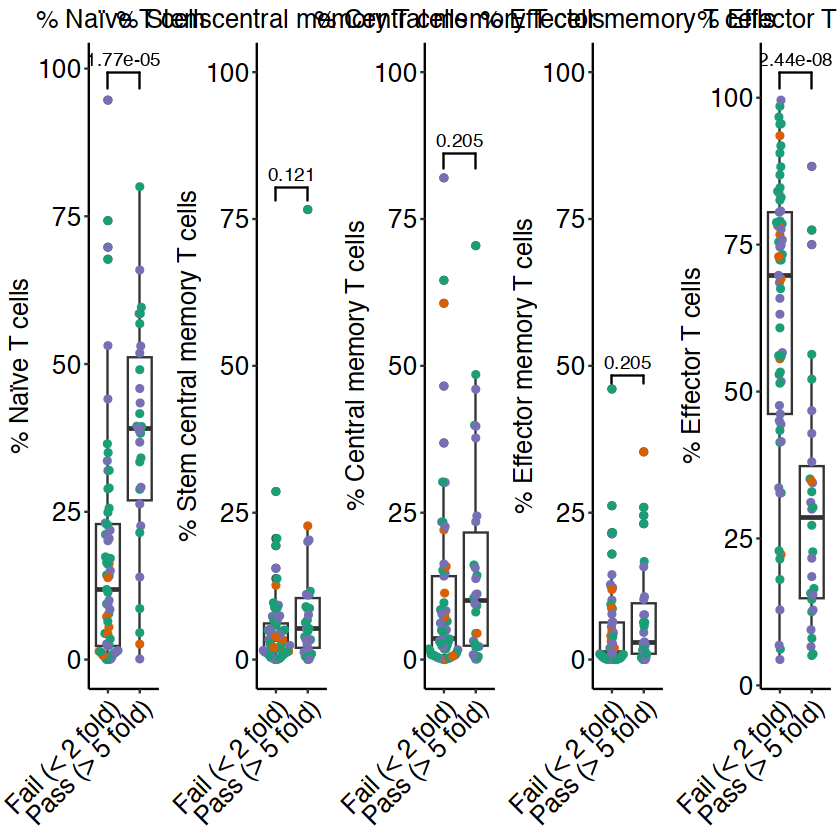

In [61]:
(aligned_p)

In [62]:
pdf(paste0(plotpath, "pbmc_tcells_foldgroups.pdf"), width = 14, height = 8)
aligned_p
dev.off()

pdf 
  2

Shannon div

In [99]:
pbmc_tcr <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$fold_group),]

In [100]:
pbmc_tcr <- pbmc_tcr[ !is.na(pbmc_tcr$TRB),]

In [101]:
colnames(pbmc_tcr)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "fold_group"         "log10shann"

In [102]:
dim(pbmc_tcr)

[1] 201  60

In [138]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p1 <- ggplot(
  data = pbmc_tcr,
  aes(x = fold_group, y = log10shann )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none", 
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = log10shann ), data = pbmc_tcr,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "T-cell diversity (log10) ", title = "T-cell diversity (PBMC, n = 201)") +
      annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) 


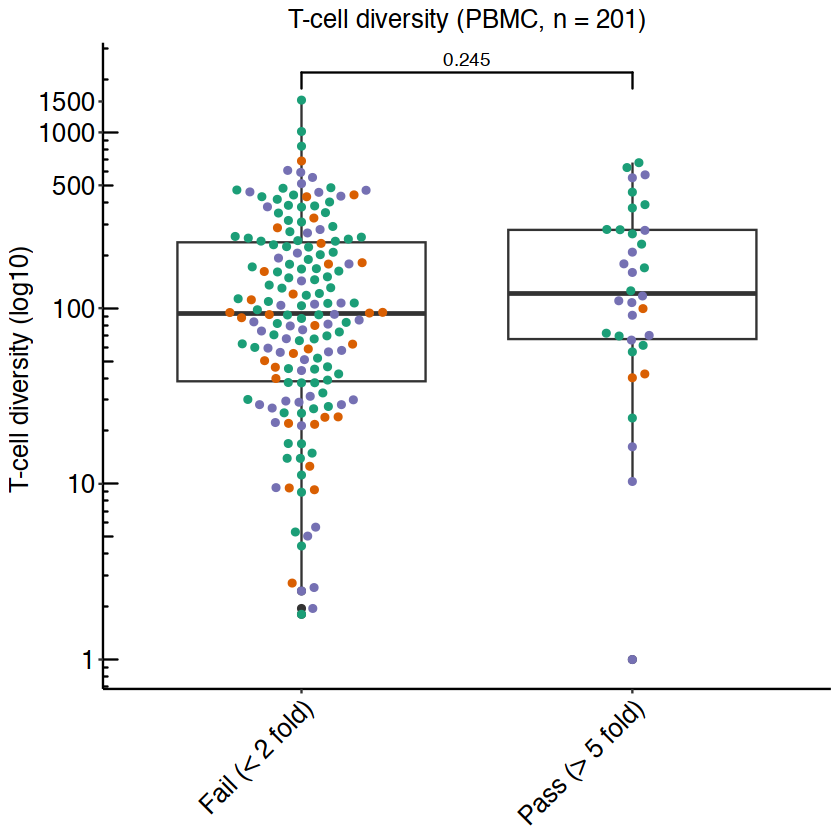

In [139]:
p1

In [140]:
cfdna_tcr <- meta_div[ meta_div$sampletype == "cfDNA" & !is.na(meta_div$fold_group),]

In [141]:
cfdna_tcr <- cfdna_tcr[ !is.na(cfdna_tcr$TRB),]

In [142]:
colnames(cfdna_tcr)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "fold_group"         "log10shann"

In [143]:
dim(cfdna_tcr)

[1] 230  60

In [144]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p2 <- ggplot(
  data = cfdna_tcr,
  aes(x = fold_group, y = log10shann )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 1.2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none", 
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = log10shann ), data = cfdna_tcr,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "T-cell diversity (log10)", title = "T-cell diversity (cfDNA, n = 230)") +
      annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,50, 100 ) ) , labels = c(1,10,50, 100)) 


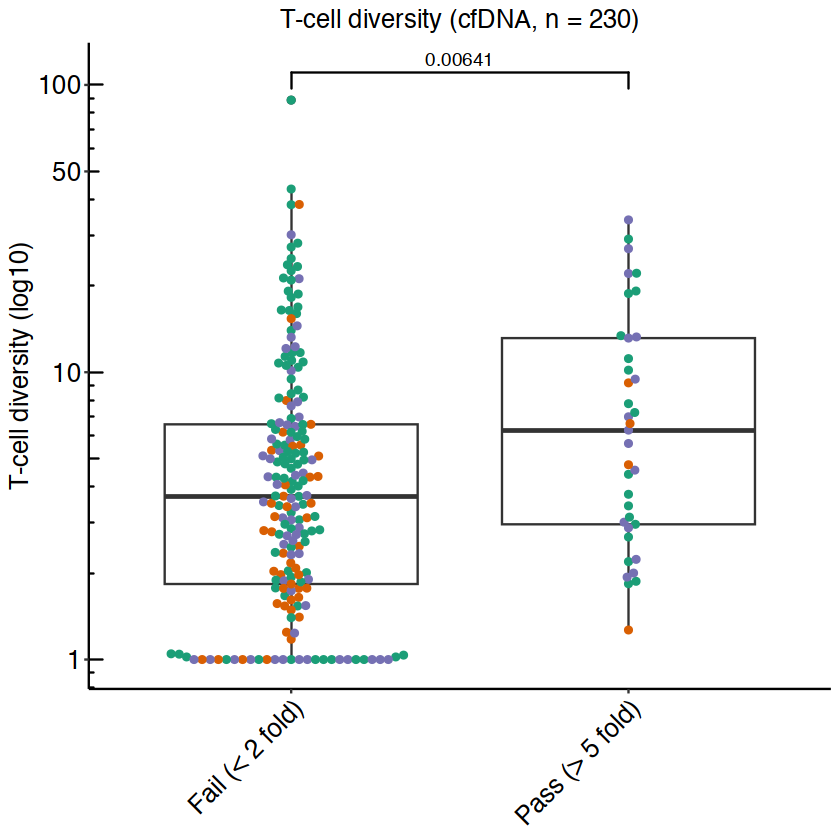

In [146]:
p2

In [147]:
aligned_pp <- cowplot::plot_grid(p1, p2, align = "h", nrow = 1)

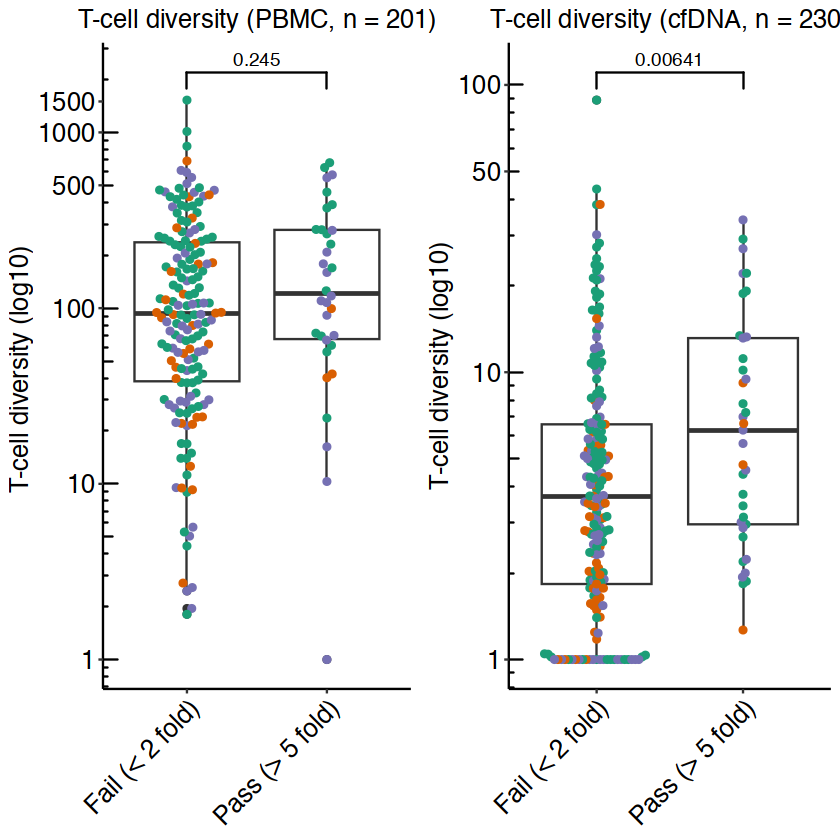

In [148]:
aligned_pp

In [149]:
pdf(paste0(plotpath, "foldgroups_cfdna_pbmc_shann.pdf"), width = 10, height = 6)
aligned_pp
dev.off()

pdf 
  2

In [ ]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p2 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = SCM. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = SCM. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test") + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Stem central memory T cells", title = "% Stem central memory T cells") +
    scale_y_continuous(limits = c(0, 100))


In [ ]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p3 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = CM. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = EM. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Central memory T cells", title = "% Central memory T cells") +
    scale_y_continuous(limits = c(0, 100))


In [ ]:
p4 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = EM. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 1.2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = EM. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Effector memory T cells", title = "% Effector memory T cells") +
    scale_y_continuous(limits = c(0, 100))


In [ ]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p5 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = TE. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = TE. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Effector T cells", title = "% Effector T cells") 


In [ ]:
aligned_p <- cowplot::plot_grid(p1, p2, p3, p4, p5, align = "h", nrow = 1)

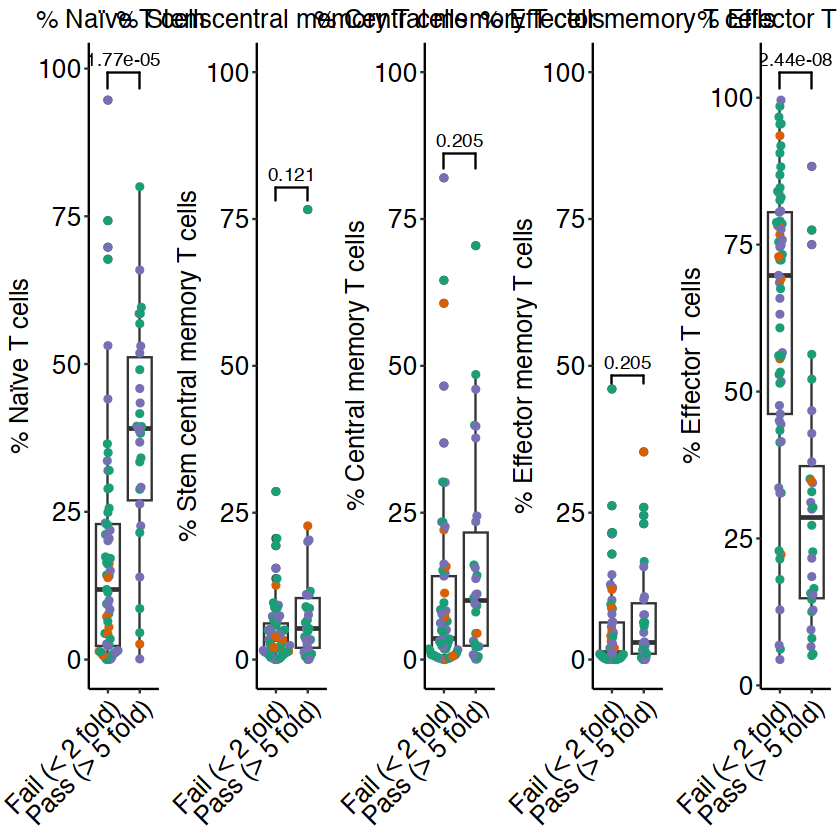

In [ ]:
(aligned_p)

Immune checkpoints

to do when Jessica confirmed the data

In [63]:
pbmc_ncr <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$fold_group),]

In [64]:
pbmc_ncr <- pbmc_ncr[ !is.na(pbmc_ncr$LAG3.),]

In [77]:
pbmc_ncr <- pbmc_ncr[ pbmc_ncr$LAG3. != "Inf",]
pbmc_ncr <- pbmc_ncr[ pbmc_ncr$LAG3. != "-Inf",]

In [83]:
colnames(pbmc_ncr)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "fold_group"         "log10shann"

In [96]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p1 <- ggplot(
  data = pbmc_ncr,
  aes(x = fold_group, y = `PD1...LAG3...TIM3` )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none", 
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = `PD1...LAG3...TIM3` ), data = pbmc_ncr,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% LAG3+", title = "% LAG3+") 


Warning message:
“Removed 90 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 90 rows containing non-finite values (`stat_pwc()`).”
Warning message:
“Computation failed in `stat_pwc()`
Caused by error in `t.test.default()`:
! not enough 'x' observations”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 90 rows containing missing values (`geom_point()`).”


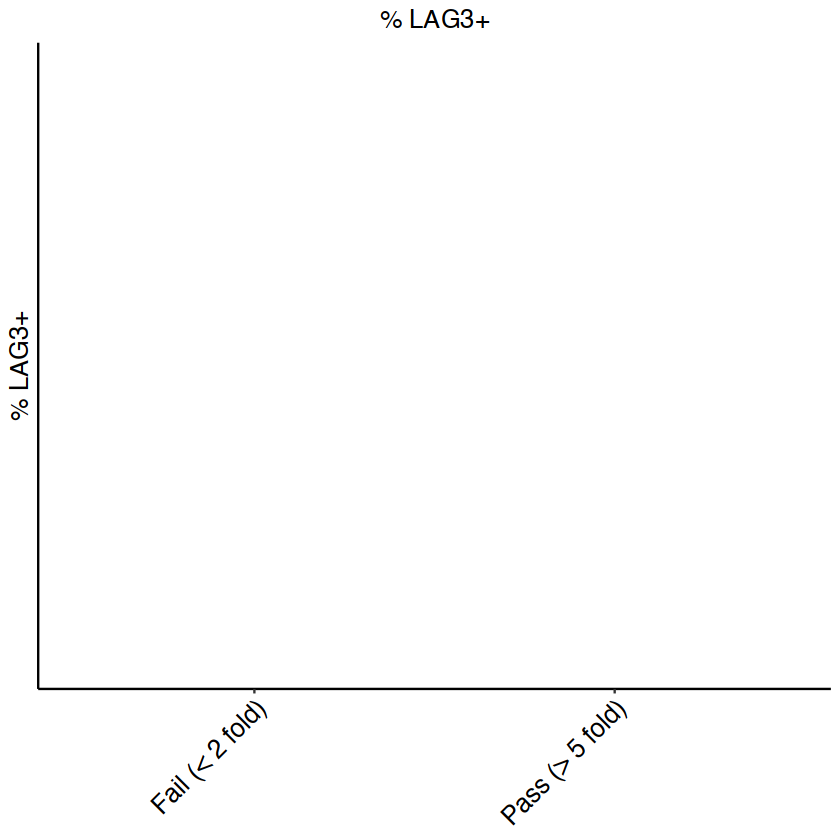

In [97]:
p1

In [ ]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p2 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = SCM. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = SCM. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test") + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Stem central memory T cells", title = "% Stem central memory T cells") +
    scale_y_continuous(limits = c(0, 100))


In [ ]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p3 <- ggplot(
  data = pbmc_tcells,
  aes(x = fold_group, y = CM. )
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme( legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) + 
  geom_pwc(
    mapping = aes( x = fold_group, y = EM. ), data = pbmc_tcells,
    p.adjust.method = "none", label = "p", size = 0.5,
    method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
    labs(y = "% Central memory T cells", title = "% Central memory T cells") +
    scale_y_continuous(limits = c(0, 100))


In [22]:
meta_div$Naive_group <- NA
meta_div$Naive_group[meta_div$`Naïve` <= 25] <- "< %25"
meta_div$Naive_group[meta_div$`Naïve` > 25] <- "> %25"

In [23]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p <- ggplot(
  data = subset(meta_div[ meta_div$sampletype == "PBMC", ],!is.na(Naive_group)),
  aes(x = Naive_group, y = FOLD)
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 1.2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) 


Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


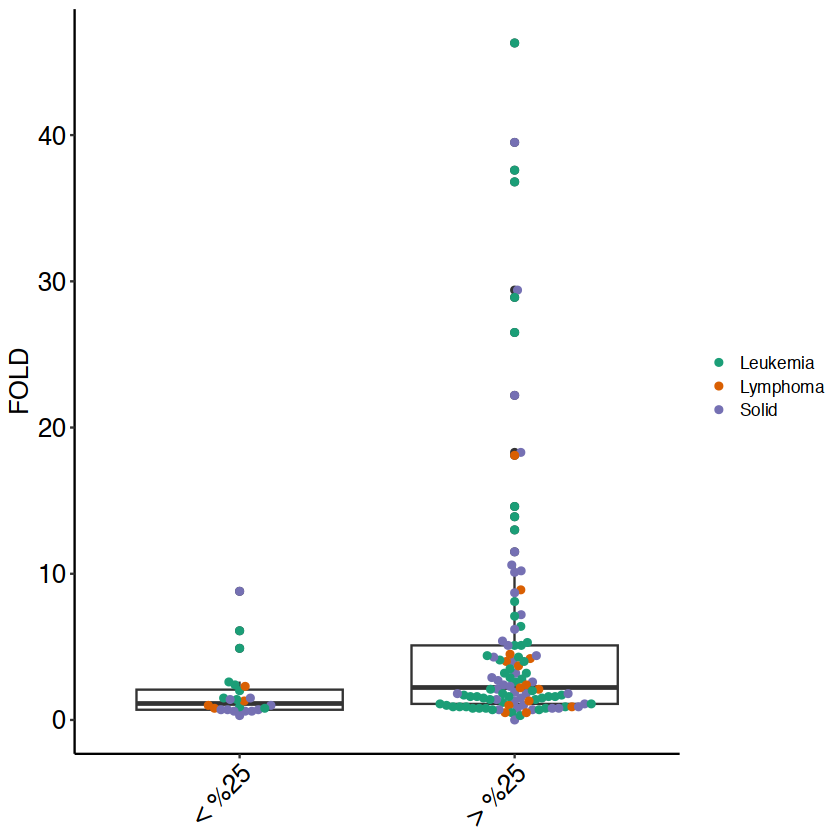

In [24]:
p

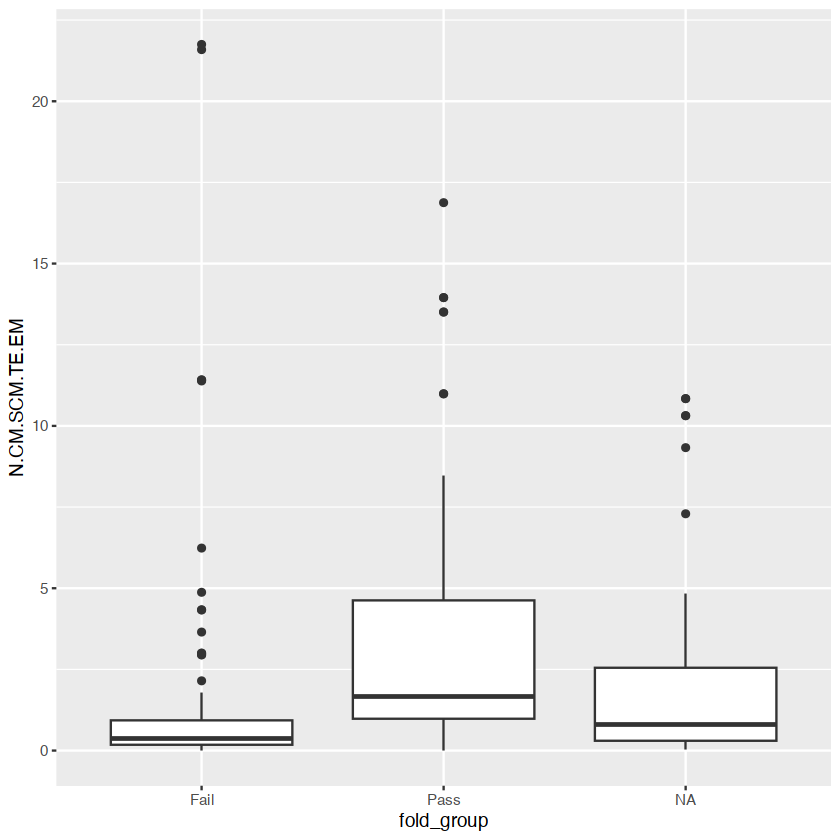

In [68]:
ggplot(meta_div, aes(x = fold_group, y = N.CM.SCM.TE.EM) ) + geom_boxplot(na.rm = T)

In [16]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [17]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]

In [18]:
meta_div$log10shann <- log10(meta_div$observed_Shannon)

In [19]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [20]:
pbmc_noLFS <- pbmc[ which(pbmc$cancergroup != "LFS"),]

In [21]:
dim(pbmc_noLFS)

[1] 234  60

In [22]:
hlas <- readr::read_rds(paste0(datapath, "/HLA/INT_HLA_PCA_postqc.rds"))

In [23]:
vgene <- readr::read_rds(paste0(datapath, "/capTCRseq/INT_PBMC_V_PCA_postqc.rds"))

In [24]:
hlas$Patient <- rownames(hlas)
hlas$Patient <- paste("CHP_", "", hlas$Patient, sep = "")
hlas$Patient <- gsub("-.*", "", hlas$Patient)

In [25]:
dim(hlas)

[1] 67 68

In [26]:
head(hlas)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,Patient
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
315-05,1.15890201,-2.898493,-3.4723486,3.3513972,-1.2856095,1.3652377,-0.98814450,0.3025367,-2.4434325,0.7885129,...,0.04809325,0.31848056,0.3792461,0.48432470,-0.31782748,-0.15632117,0.11953686,0.0143342286,-2.666270e-15,CHP_315
319-05,-4.56374676,-1.367813,2.0296584,-0.8423059,-0.7075454,-2.2932518,1.85458779,0.7702846,-0.5651254,1.6015236,...,0.80729791,0.29301440,0.1399793,0.22943811,-0.69063112,0.19551515,-0.08730404,-0.0411502225,1.908196e-17,CHP_319
323-03,4.29021503,-1.655735,-1.5965245,0.1538018,1.9207118,-1.5288560,3.20844423,-3.1797025,3.5822593,-1.8978836,...,-0.04265836,-0.04030207,-0.1558266,-0.07187716,-0.08719310,-0.01660297,-0.05961457,0.0770658974,1.462372e-15,CHP_323
329-04,-4.25557065,0.314588,-4.4081750,-1.0062229,4.8715689,-0.2699918,-1.20600856,-0.9781981,1.8880483,0.7504148,...,0.10208720,-0.38351856,0.1420335,0.07055897,0.30820487,0.01584124,0.03888392,-0.1613784630,-3.278627e-16,CHP_329
330-05,-0.08941476,-2.768304,2.1200714,-3.4903109,-1.0884092,-1.3053444,-0.04510793,-2.1610084,-0.1333316,1.4136399,...,-0.07073121,0.16185579,0.3380909,0.34679493,0.13256591,-0.01518200,-0.02311564,-0.1974133531,1.115427e-15,CHP_330
331-04,3.44426309,4.036729,0.8425664,-0.1457962,1.5503795,0.8197901,1.79551677,0.8606525,-2.9234943,0.1003881,...,0.60078922,0.78459363,-0.1427119,0.11234774,0.04738167,-0.21322384,-0.04261676,-0.0001452749,4.631712e-16,CHP_331


In [27]:
pbmc_noLFS$HLA_PC1 <- hlas[ match(pbmc_noLFS$Patient, hlas$Patient), "PC1"]
pbmc_noLFS$HLA_PC2 <- hlas[ match(pbmc_noLFS$Patient, hlas$Patient), "PC2"]
pbmc_noLFS$HLA_PC3 <- hlas[ match(pbmc_noLFS$Patient, hlas$Patient), "PC3"]

In [28]:
pbmc_noLFS$V_PC1 <- vgene[ match(pbmc_noLFS$basename, rownames(vgene)), "PC1"]
pbmc_noLFS$V_PC2 <- vgene[ match(pbmc_noLFS$basename, rownames(vgene)), "PC2"]
pbmc_noLFS$V_PC3 <- vgene[ match(pbmc_noLFS$basename, rownames(vgene)), "PC3"]

In [29]:
pbmc_noLFS$is_solid <- NA
pbmc_noLFS$is_solid[ which(pbmc_noLFS$cancergroup == "Solid")] <- 1
pbmc_noLFS$is_solid[ which(pbmc_noLFS$cancergroup != "Solid")] <- 0

In [30]:
pbmc_noLFS$is_leu <- NA
pbmc_noLFS$is_leu[ which(pbmc_noLFS$cancergroup == "Leukemia")] <- 1
pbmc_noLFS$is_leu[ which(pbmc_noLFS$cancergroup != "Leukemia")] <- 0

In [31]:
pbmc_noLFS$is_lym <- NA
pbmc_noLFS$is_lym[ which(pbmc_noLFS$cancergroup == "Lymphoma")] <- 1
pbmc_noLFS$is_lym[ which(pbmc_noLFS$cancergroup != "Lymphoma")] <- 0

In [27]:
table(pbmc_noLFS$cancergroup )


Leukemia Lymphoma    Solid 
     120       42       72 

In [44]:
dd <- datadist(pbmc_noLFS[ , c("TE.","cycle", "cancergroup", "HLA_PC1", "HLA_PC2", "HLA_PC3", "fold_group", "V_PC1", "V_PC2", "V_PC3", "log10shann",  "is_solid", "is_leu", "is_lym")])
options(datadist="dd")

In [45]:
myfit <- lrm(fold_group ~ log10shann + TE. + HLA_PC1 + HLA_PC2 + HLA_PC3 + cancergroup + cycle, data = pbmc_noLFS)

In [46]:
anova(myfit)

,Chi-Square,d.f.,P
log10shann,5.200819,1,0.022576242
TE.,10.073131,1,0.001504471
HLA_PC1,1.696556,1,0.192739023
HLA_PC2,2.399292,1,0.121390152
HLA_PC3,6.139819,1,0.013217086
cancergroup,0.227053,2,0.892680524
cycle,6.674563,4,0.154118434
TOTAL,18.982831,11,0.061402401


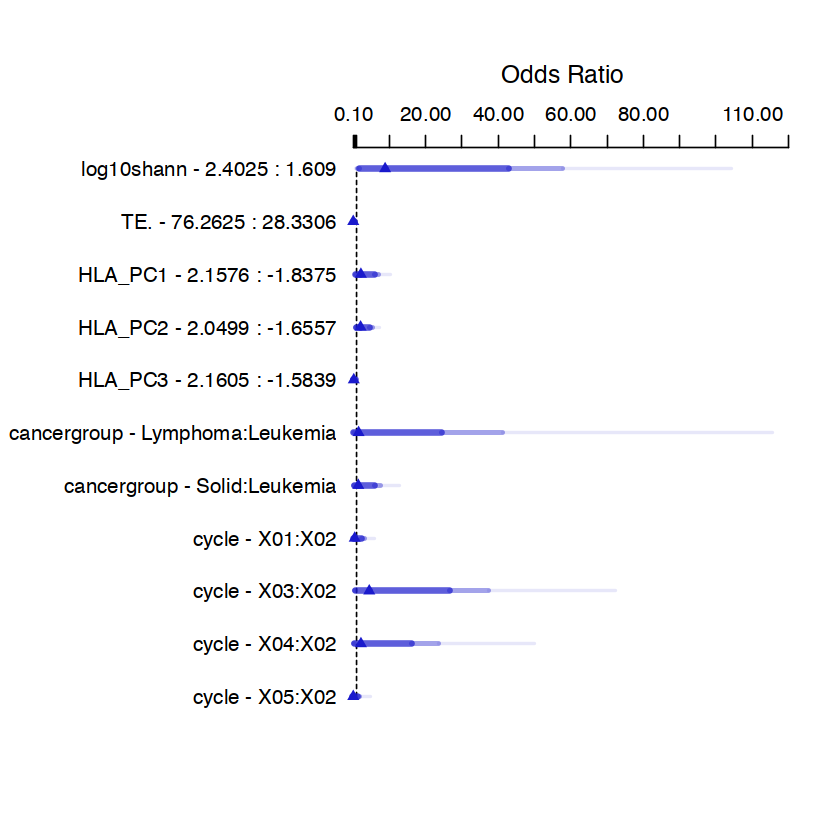

In [49]:
plot(summary(myfit ) )